In [4]:
import sys, os
sys.path.append("\\".join(os.getcwd().split("\\")[:-1]))

from src.dataloader import KaggleMNISTDataset
from src.cnn import Net

import torch
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader

In [5]:
def train(model, device, train_loader, optimizer):
    model.train()
    tot_loss = 0
    correct = 0
    for i, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        loss = torch.nn.CrossEntropyLoss()(output, target)
        loss.backward()
        optimizer.step()
        correct += pred.eq(target.view_as(pred)).sum().item()

    return correct, tot_loss




Training the Model...
	0.0% complete
	10.0% complete
	20.0% complete
	30.0% complete
	40.0% complete
	50.0% complete
	60.0% complete
	70.0% complete
	80.0% complete
	90.0% complete


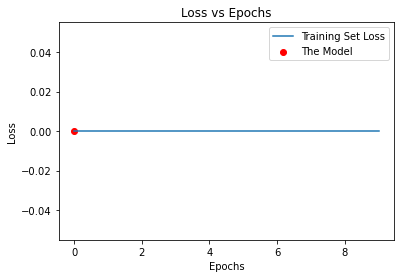

In [9]:
training_data = KaggleMNISTDataset('d:\\Projects\\kaggle_digit_recog\\data\\train.csv')
train_dataloader = DataLoader(training_data, shuffle = True)

max_epoch = 10
model_path = "d:\\Projects\\kaggle_digit_recog\\models\\model.pt"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = Net().to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

best_test_loss = 99999999999
best_epoch = 0
train_loss = []
train_correct = []
print("\n\nTraining the Model...")
for epoch in range(0, max_epoch):
    correct, tot_loss = train(model, device, train_dataloader, optimizer)
    print("\t" + str(epoch / max_epoch * 100) + "% complete")
    train_loss.append(tot_loss)
    train_correct.append(correct)
    scheduler.step()

    if best_test_loss > tot_loss:
        best_test_loss = tot_loss
        best_epoch = epoch
        best_correct = correct
        torch.save(model, model_path)

e = list(range(max_epoch))
plt.plot(e, train_loss, label="Training Set Loss")
plt.scatter([best_epoch], [best_test_loss], label="The Model", c="red")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

In [10]:
train_loss

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]